# Project 3 : Web APIs and NLP

In this notebook we will be covering the following:

1. [Inital understanding of datasets](#Inital_understanding_of_datasets)
2. [Data Cleaning](#Data_Cleaning)
3. [Regular Expression](#Regular_Expression)
4. [Lemmatization](#Lemmatization)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer          
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import regex as re

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# Importing dataset

ds = pd.read_csv('../data/datasci.csv')
de = pd.read_csv('../data/dataengin.csv')

## Initial understanding of datasets

In [3]:
display(ds.head())
display(de.head())

all_awardings  allow_live_comments       author author_flair_css_class  \
0            []                False  mercury0100                    NaN   
1            []                False  Fail-Wooden                    NaN   
2            []                False    pykit_org                    NaN   
3            []                False  MonteSS_454                    NaN   
4            []                False      1Minnee                    NaN   

  author_flair_richtext author_flair_text author_flair_type author_fullname  \
0                    []               NaN              text     t2_i33mpady   
1                    []               NaN              text     t2_8sgme8om   
2                    []               NaN              text     t2_9060ijmj   
3                    []               NaN              text        t2_ubz9o   
4                    []               NaN              text     t2_3evxli8x   

   author_is_blocked author_patreon_flair  ... crosspost_parent_list  \
0              False                False  ...                   NaN   
1              False                False  ...                   NaN   
2              False                False  ...                   NaN   
3              False                False  ...                   NaN   
4              False                False  ...                   NaN   

  media_metadata  poll_data  author_flair_background_color  \
0            NaN        NaN                            NaN   
1            NaN        NaN                            NaN   
2            NaN        NaN                            NaN   
3            NaN        NaN                            NaN   
4            NaN        NaN                            NaN   

   author_flair_text_color distinguished author_cakeday is_gallery  \
0                      NaN           NaN            NaN        NaN   
1                      NaN           NaN            NaN        NaN   
2                      NaN           NaN            NaN        NaN   
3                      NaN           NaN            NaN        NaN   
4                      NaN           NaN            NaN        NaN   

  gallery_data  author_flair_template_id  
0          NaN                       NaN  
1          NaN                       NaN  
2          NaN                       NaN  
3          NaN                       NaN  
4          NaN                       NaN  

[5 rows x 84 columns]

all_awardings  allow_live_comments             author  \
0            []                False             urs123   
1            []                False          manish_ks   
2            []                False  Junior_Abies_2213   
3            []                False     LowProgram6449   
4            []                False          barnyard9   

  author_flair_background_color author_flair_css_class author_flair_richtext  \
0                   transparent                    NaN                    []   
1                           NaN                    NaN                    []   
2                           NaN                    NaN                    []   
3                           NaN                    NaN                    []   
4                           NaN                    NaN                    []   

               author_flair_template_id author_flair_text  \
0  fbc7d3e6-ac9c-11eb-adda-0e0b12e4a59b     Data Engineer   
1                                   NaN               NaN   
2                                   NaN               NaN   
3                                   NaN               NaN   
4                                   NaN               NaN   

  author_flair_text_color author_flair_type  ... media_metadata  gallery_data  \
0                    dark              text  ...            NaN           NaN   
1                     NaN              text  ...            NaN           NaN   
2                     NaN              text  ...            NaN           NaN   
3                     NaN              text  ...            NaN           NaN   
4                     NaN              text  ...            NaN           NaN   

  is_gallery author_cakeday poll_data  crosspost_parent  \
0        NaN            NaN       NaN               NaN   
1        NaN            NaN       NaN               NaN   
2        NaN            NaN       NaN               NaN   
3        NaN            NaN       NaN               NaN   
4        NaN            NaN       NaN               NaN   

   crosspost_parent_list  edited banned_by collections  
0                    NaN     NaN       NaN         NaN  
1                    NaN     NaN       NaN         NaN  
2                    NaN     NaN       NaN         NaN  
3                    NaN     NaN       NaN         NaN  
4                    NaN     NaN       NaN         NaN  

[5 rows x 84 columns]

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  1000 non-null   object 
 1   allow_live_comments            1000 non-null   bool   
 2   author                         1000 non-null   object 
 3   author_flair_css_class         2 non-null      object 
 4   author_flair_richtext          999 non-null    object 
 5   author_flair_text              7 non-null      object 
 6   author_flair_type              999 non-null    object 
 7   author_fullname                999 non-null    object 
 8   author_is_blocked              1000 non-null   bool   
 9   author_patreon_flair           999 non-null    object 
 10  author_premium                 999 non-null    object 
 11  awarders                       1000 non-null   object 
 12  can_mod_post                   1000 non-null   bo

In [5]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  1000 non-null   object 
 1   allow_live_comments            1000 non-null   bool   
 2   author                         1000 non-null   object 
 3   author_flair_background_color  16 non-null     object 
 4   author_flair_css_class         3 non-null      object 
 5   author_flair_richtext          997 non-null    object 
 6   author_flair_template_id       16 non-null     object 
 7   author_flair_text              16 non-null     object 
 8   author_flair_text_color        19 non-null     object 
 9   author_flair_type              997 non-null    object 
 10  author_fullname                997 non-null    object 
 11  author_is_blocked              1000 non-null   bool   
 12  author_patreon_flair           997 non-null    ob

There are several columns with null values or values that has no meaning (egs. '[]'). As the model will be built around using keywords to classify subreddit categories, we will be primarily using the columns 'selftext', 'title', and 'subreddit' for both dataframes. Therefore we will be dropping the rest of the columns before proceeding with further analysis.

In [6]:
# Dropping all columns except for 'title', ' selftext' and 'subreddit'.

ds = ds[['title','selftext','subreddit']]
de = de[['title','selftext','subreddit']]

In [7]:
display(ds.head())
display(de.head())

title  \
0  Edge Regression with Edge Features in Graph Ne...   
1                      Aspiring to be a data analyst   
2  How to build your own Chatbot in Python (using...   
3  DS/BI Graduate Certificates VS Masters of DS/C...   
4          Target salary for fresh PhD grad in Stats   

                                            selftext    subreddit  
0  Hey guys,\n\nI'm working on a GNN to do edge r...  datascience  
1  Can someone suggest me how I should study data...  datascience  
2                                                NaN  datascience  
3  As title says. I know most people in the DS fi...  datascience  
4  Hi all, I'm graduating from my PhD in a few mo...  datascience

title  \
0                                     Amazon Ads API   
1  Castled.io is the fastest Reverse ETL platform...   
2  How to avoid jdbc in Azure Synapse Analytics u...   
3                     Help for Project's Data Source   
4      Forums for asking homework help for big data?   

                                            selftext        subreddit  
0  I need to extract data from Amazon Ads and DSP...  dataengineering  
1  Castled is 6x to 13x faster than other Reverse...  dataengineering  
2  Hi, currently I am doing ETL process using syn...  dataengineering  
3  Hi! I am trying to build a project for my uni'...  dataengineering  
4  I am ofc not asking to do my homework, but  so...  dataengineering

### Exploring and cleaning 'title' and 'selftext' columns

In [8]:
ds['title'].value_counts()

How to deal with non technical manager’s approach that I disagree with?                                                                                 3
Python Compiler                                                                                                                                         2
Java compiler                                                                                                                                           2
Lets learn how to implement a Bubble Sort                                                                                                               2
Help regarding career opportunities                                                                                                                     2
                                                                                                                                                       ..
⚡ STriP Net: Semantic Similarity of Scientific Papers Network               

In [9]:
ds['selftext'].value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [10]:
de['title'].value_counts()

Need a reality check: will focusing on Data Operations hurt my career progression as a DE?    2
The Guide to Data Versioning                                                                  2
dbt Tests – Create Staging Environments for Flawless Data CI/CD                               2
Scaling Airflow with a Celery cluster using Docker swarm                                      2
Expected UK Data Engineer salary ranges                                                       2
                                                                                             ..
installing Airflow error                                                                      1
How do you handle schema changes in tables and data files?                                    1
The US Dream                                                                                  1
Data Engineer or Product Owner                                                                1
Stuck in finding a job in UK, Need Advic

In [11]:
de['selftext'].value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

There are some values '[removed]' and '[deleted]' from 'selftext' column in both datasets, most likely being omitted or removed from the subreddit pages due to certain non-compliance with reddit regulations. We will be dropping these rows from our datasets.

## Data Cleaning

### Removing unnecessary rows

In [12]:
# Count of rows with '[removed]' or ['deleted']

print('Number of "[removed]" in datascience:', len(ds[ds['selftext'] == '[removed]']))
print('Number of "[deleted]" in datascience:', len(ds[ds['selftext'] == '[deleted]']))
print('Number of "[removed]" in dataengineering:', len(de[de['selftext'] == '[removed]']))
print('Number of "[deleted]" in dataengineering:', len(de[de['selftext'] == '[deleted]']))

Number of "[removed]" in datascience: 57
Number of "[deleted]" in datascience: 1
Number of "[removed]" in dataengineering: 39
Number of "[deleted]" in dataengineering: 2


In [13]:
# Dropping ['removed'] and '[deleted]' values from 'selftext' column

ds = ds[(ds['selftext'] != '[removed]')&(ds['selftext']!= '[deleted]')]
de = de[(de['selftext'] != '[removed]')&(de['selftext']!= '[deleted]')]

# Reset index
ds = ds.reset_index(drop = True)
de = de.reset_index(drop = True)

In [14]:
ds.shape

(942, 3)

In [15]:
de.shape

(959, 3)

### Cleaning null values

There are null values present in 'selftext' columns in both datasets, and we will be imputing them with the values in 'title' column as selftexts are usually related to the title itself. The null values have occured due to posters writing only titles for their posts and not the selftext.

In [16]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      959 non-null    object
 1   selftext   822 non-null    object
 2   subreddit  959 non-null    object
dtypes: object(3)
memory usage: 22.6+ KB


In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      942 non-null    object
 1   selftext   741 non-null    object
 2   subreddit  942 non-null    object
dtypes: object(3)
memory usage: 22.2+ KB


In [18]:
# Imputing null values in 'selftext' column with 'title' column values

ds['selftext'].fillna(ds['title'], axis = 0, inplace = True)
de['selftext'].fillna(de['title'], axis = 0, inplace = True)


In [19]:
# Checking for changes made

display(ds.info())
display(de.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      942 non-null    object
 1   selftext   942 non-null    object
 2   subreddit  942 non-null    object
dtypes: object(3)
memory usage: 22.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      959 non-null    object
 1   selftext   959 non-null    object
 2   subreddit  959 non-null    object
dtypes: object(3)
memory usage: 22.6+ KB


None

## Regular Expression

### Regex

In order to understand the type of words that exists in our datasets, we will be applying regex to remove punctuations and converting our words to lowercase. We will also be removing html links as they are often encrypted and does not help machine learning models. After, we will be applying lemmatization technique to look at which words appear the most frequently.

With that information, we will know which words we will keep and or remove for our modelling.

In [20]:
# Applying regex to clean data column

# Function to clean data columns with regex

tokenizer = RegexpTokenizer(r'[A-Za-z]\w+')

def regex_cleaning(data, columns):
    #tokenizer = RegexpTokenizer(r'\w+')
    
    for col in columns:
        
        # Removal of html links
        regex_html = r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b'
        data[col].replace(regex = True, inplace = True, to_replace = regex_html, value = r'')
        
        # Removal of of punctuations and change lowercase
        data[col] = data[col].map(lambda x: tokenizer.tokenize(x.lower()))
        data[col] = data[col].map(lambda x: ' '.join(x))
        
    return data

In [21]:
# Regex clean both 'datascience' and 'dataengineering' datasets

regex_cleaning(data = ds, columns = ['title','selftext'])
regex_cleaning(data = de, columns = ['title','selftext'])

title  \
0                                       amazon ads api   
1    castled io is the fastest reverse etl platform...   
2    how to avoid jdbc in azure synapse analytics u...   
3                         help for project data source   
4         forums for asking homework help for big data   
..                                                 ...   
954  made pancakedb new type of columnar db that us...   
955  how to replace all values with one integer and...   
956     how to switch from etl testing role to de role   
957  has anyone done an aws live classroom training...   
958              options for client data retrieval etl   

                                              selftext        subreddit  
0    need to extract data from amazon ads and dsp c...  dataengineering  
1    castled is to faster than other reverse etl pl...  dataengineering  
2    hi currently am doing etl process using synaps...  dataengineering  
3    hi am trying to build project for my uni fyp a...  dataengineering  
4    am ofc not asking to do my homework but someti...  dataengineering  
..                                                 ...              ...  
954  made pancakedb new type of columnar db that us...  dataengineering  
955               basically binning or other as thanks  dataengineering  
956  have years of work experience in etl testing a...  dataengineering  
957  specifically asking for the data warehousing o...  dataengineering  
958  we are planning to build product to provide da...  dataengineering  

[959 rows x 3 columns]

### Common words in 'title' and 'selftext' 

We will be looking at the common words in both categories before further preprocessing.

In [22]:
# Plotting and comparing top 30 common words in both datasets with CountVectorizer in columns 'title' and 'selftext'
# using two and three n_grams

# Function to plot words that appear the most number of times
def plot_top_count(df1, df2, column, numcount):
    cvec = CountVectorizer(stop_words = 'english', ngram_range = (1,2))
    
    # Fit CountVectorizer on first dataframe column
    cvec1 = cvec.fit_transform(df1[column])
    df1 = pd.DataFrame(cvec1.todense(), columns = cvec.get_feature_names())
    df1_top = df1.sum().sort_values(ascending = False)[:numcount]
    
    # Fit CountVectorizer on second dataframe column
    cvec2 = cvec.fit_transform(df2[column])
    df2 = pd.DataFrame(cvec2.toarray(), columns = cvec.get_feature_names()) 
    df2_top = df2.sum().sort_values(ascending = False)[:numcount]
    
    # Plot subplot for both dataframes
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,10), sharex = True)
    
    sns.barplot(x = df1_top, y = df1_top.index.values, color='orange', ax = ax[0])
    ax[0].set_title(f'Top {numcount} words in {column} column', fontsize = 16)
    ax[0].set_xlabel('Count of words/phrases', fontsize = 12)
    plt.setp(ax[0].get_yticklabels(), fontsize=14)

    sns.barplot(x = df2_top, y = df2_top.index.values, color='orange', ax = ax[1])
    ax[1].set_title(f'Top {numcount} words in {column} column',fontsize=16)
    ax[1].set_xlabel('Count of words/phrases', fontsize=12)
    plt.setp(ax[1].get_yticklabels(), fontsize=14)

    plt.tight_layout()


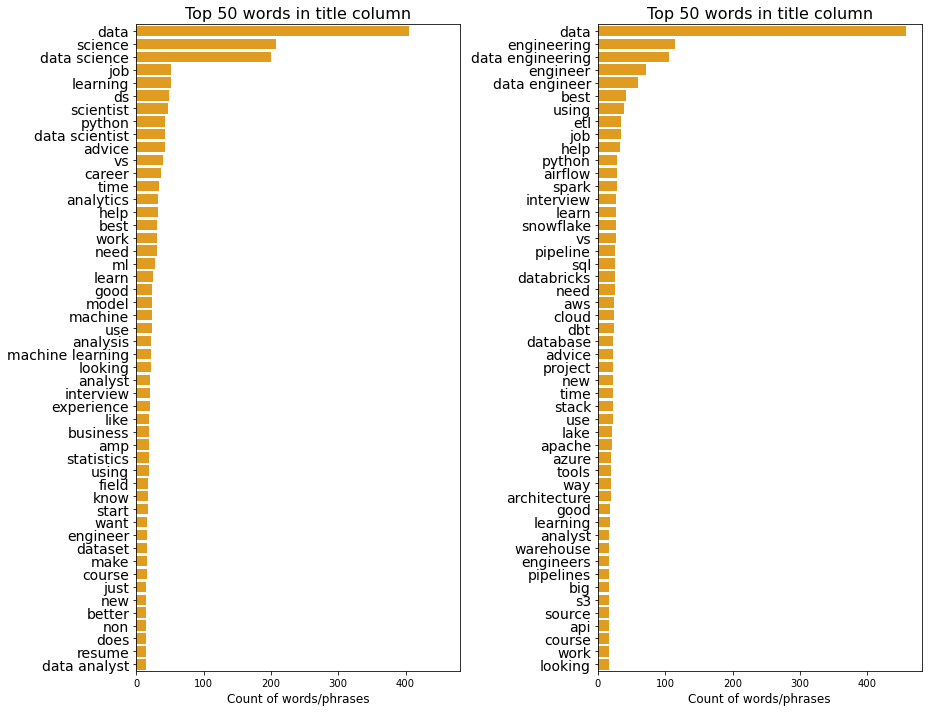

In [23]:
plot_top_count(ds,de,'title',50)

We can see that the most number of words that appear in each title are heavily skewed towards the name of the subreddit itself. There are also numerous words relating to learning of data science, engineering and of seeking help or advice. This is expected, given that the data science/ engineering field has been a much desired skill as of late. However, this does not allow our model to learn very meaningful words to decipher which subreddit the post came from. Moreover, a simple word search would allow users to know which subreddit the post belongs to. We will be removing the keywords 'data','science', 'engineering' and any 'lemmas' of the keywords (egs. 'engineers','scientists' etc).

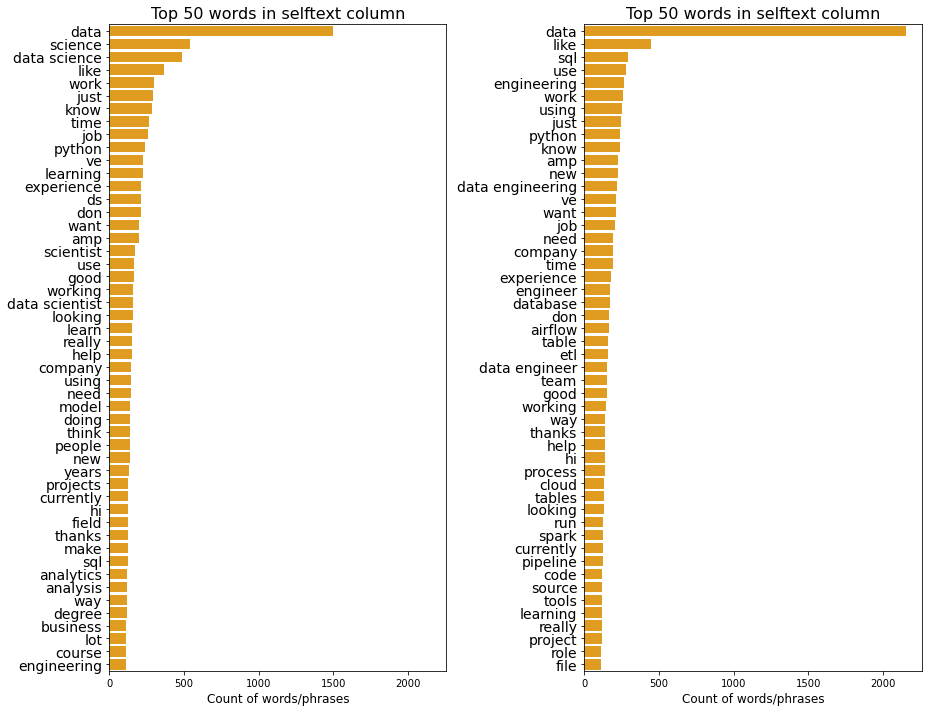

In [24]:
# Comparing top 50 words in both dataset 'selftexts'

plot_top_count(ds, de, 'selftext', 50)

Similarly to the results in 'title' columns, the most frequent words in 'selftext' columns tend to gravitate towards the subreddit topic. This further corroborates our findings in the 'title' columns. From the findings, we also have more words to remove before modelling such as 'like', 'know', job', 'good','hi'.

## Lemmatization

### Lemmatizing values

Lemmatization is a technique to convert words into its 'lemmas', such as removing 's' from plurals and '-ing' from verbs. A consequence of this technique is that words such as 'was' will be converted into 'wa'. We will be exploring the top 50 words that appear in both datasets and columns using this technique.

In [25]:
# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [26]:
for i in ds['selftext']:
    w_token = tokenizer.tokenize(i)
    tokens_lem = [lemmatizer.lemmatize(token) for token in w_token]
    print(tokens_lem)

['hey', 'guy', 'working', 'on', 'gnn', 'to', 'do', 'edge', 'regression', 'using', 'both', 'node', 'feature', 'and', 'the', 'edge', 'weight', 'of', 'three', 'type', 'of', 'edge', 'it', 'seems', 'to', 'me', 'that', 'when', 'predicting', 'target', 'edge', 'weight', 'the', 'neighbouring', 'edge', 'weight', 'can', 'carry', 'interesting', 'information', 'at', 'the', 'same', 'time', 'including', 'those', 'edge', 'weight', 'a', 'feature', 'obviously', 'lead', 'to', 'leakage', 'is', 'there', 'some', 'way', 'of', 'dealing', 'with', 'this', 'or', 'am', 'wrong', 'in', 'my', 'assumption', 'my', 'current', 'approach', 'is', 'to', 'basically', 'stochastically', 'drop', 'out', 'edge', 'at', 'each', 'training', 'epoch', 'and', 'remove', 'the', 'test', 'edge', 'from', 'the', 'graph', 'entirely', 'which', 'ha', 'produced', 'mild', 'underwhelming', 'improvement']
['can', 'someone', 'suggest', 'me', 'how', 'should', 'study', 'data', 'science', 'with', 'better', 'efficiency', 'from', 'engineering', 'backgro

['hey', 'everyone', 'finishing', 'undergrad', 'this', 'year', 'hopefully', 'with', 'ba', 'in', 'econ', 'in', 'the', 'process', 'of', 'applying', 'to', 'the', 'program', 'and', 'just', 'wa', 'wondering', 'what', 'should', 'expect', 'in', 'the', 'admission', 'process', 'during', 'the', 'program', 'and', 'job', 'prospect', 'afterward', 'have', 'the', 'following', 'question', 'sorry', 'if', 'they', 're', 'too', 'much', 'just', 'figured', 'this', 'is', 'the', 'only', 'place', 'where', 'can', 'get', 'lot', 'of', 'these', 'question', 'answered', 'have', 'ug', 'gpa', 'but', 'no', 'research', 'experience', 'and', 'weak', 'major', 'how', 'doe', 'this', 'make', 'me', 'stack', 'up', 'in', 'the', 'admission', 'process', 'am', 'weak', 'applicant', 'how', 'nervous', 'should', 'be', 'during', 'the', 'program', 'any', 'advice', 'on', 'maximizing', 'return', 'getting', 'into', 'research', 'or', 'job', 'market', 'prep', 'prefer', 'to', 'try', 'and', 'pursue', 'an', 'mle', 'based', 'job', 'following', 'th

['an', 'undergrad', 'stats', 'major', 'math', 'minor', 'whose', 'taken', 'lot', 'of', 'coursework', 'with', 'regard', 'to', 'statistic', 'and', 'theory', 'and', 'how', 'to', 'use', 'for', 'analysis', 'took', 'only', 'two', 'software', 'dev', 'course', 'in', 'java', 'and', 'only', 'know', 'python', 'for', 'data', 'analysis', 'and', 'sql', 'my', 'background', 'and', 'my', 'future', 'interest', 'in', 'getting', 'master', 'in', 'statistic', 'would', 'put', 'me', 'in', 'the', 'position', 'of', 'analysis', 'man', 'data', 'science', 'archetype', 'someone', 'who', 'could', 'do', 'analysis', 'for', 'day', 'do', 'some', 'modeling', 'in', 'rmarkdown', 'or', 'colab', 'and', 'talk', 'about', 'insight', 'and', 'at', 'minimum', 'put', 'it', 'on', 'dashboard', 'but', 'no', 'real', 'cloud', 'experience', 'software', 'engineering', 'or', 'anything', 'like', 'that', 've', 'heard', 'that', 'having', 'stats', 'background', 'in', 'data', 'science', 'is', 'great', 'choice', 'but', 'wondering', 'a', 'to', 'ho

In [27]:
# Function to lemmatize column values
tokenizer = RegexpTokenizer(r'[A-Za-z]\w+')

def lemmatize(data, columns):
    for col in columns:
        
        # Creating new columns for lemmatized words
        data[f'{col} lemmatized'] = ' '
        
        # Applying tokenizing and lemmatizing
        for index, val in enumerate(data[col]):
            w_token = tokenizer.tokenize(val)
            val = [lemmatizer.lemmatize(token) for token in w_token]
            data[f'{col} lemmatized'][index] = ' '.join(val)

    return data

In [28]:
# Lemmatizing column values

ds = lemmatize(data = ds, columns = ['title','selftext'])
de = lemmatize(data = de, columns = ['title','selftext'])

In [29]:
ds

title  \
0    edge regression with edge features in graph ne...   
1                          aspiring to be data analyst   
2    how to build your own chatbot in python using ...   
3    ds bi graduate certificates vs masters of ds c...   
4            target salary for fresh phd grad in stats   
..                                                 ...   
937  ve had similar experience to this in what is s...   
938        what are core components of neural networks   
939  how important is numerical analysis for data s...   
940          how to know convolutional neural networks   
941  how to avoid overfitting in deep learning neur...   

                                              selftext    subreddit  \
0    hey guys working on gnn to do edge regression ...  datascience   
1    can someone suggest me how should study data s...  datascience   
2    how to build your own chatbot in python using ...  datascience   
3    as title says know most people in the ds field...  datascience   
4    hi all graduating from my phd in few months an...  datascience   
..                                                 ...          ...   
937  ve had similar experience to this in what is s...  datascience   
938        what are core components of neural networks  datascience   
939  already signed up for numerical methods class ...  datascience   
940          how to know convolutional neural networks  datascience   
941  how to avoid overfitting in deep learning neur...  datascience   

                                      title lemmatized  \
0    edge regression with edge feature in graph neu...   
1                          aspiring to be data analyst   
2    how to build your own chatbot in python using ...   
3     d bi graduate certificate v master of d c degree   
4            target salary for fresh phd grad in stats   
..                                                 ...   
937  ve had similar experience to this in what is s...   
938          what are core component of neural network   
939  how important is numerical analysis for data s...   
940           how to know convolutional neural network   
941  how to avoid overfitting in deep learning neur...   

                                   selftext lemmatized  
0    hey guy working on gnn to do edge regression u...  
1    can someone suggest me how should study data s...  
2    how to build your own chatbot in python using ...  
3    a title say know most people in the d field lo...  
4    hi all graduating from my phd in few month and...  
..                                                 ...  
937  ve had similar experience to this in what is s...  
938          what are core component of neural network  
939  already signed up for numerical method class f...  
940           how to know convolutional neural network  
941  how to avoid overfitting in deep learning neur...  

[942 rows x 5 columns]

In [30]:
ds['selftext'][0]

'hey guys working on gnn to do edge regression using both node features and the edge weights of three types of edge it seems to me that when predicting target edge weight the neighbouring edge weights can carry interesting information at the same time including those edge weights as features obviously leads to leakage is there some way of dealing with this or am wrong in my assumptions my current approach is to basically stochastically drop out edges at each training epoch and remove the test edges from the graph entirely which has produced mild underwhelming improvement'

In [31]:
ds['selftext lemmatized'][0]

'hey guy working on gnn to do edge regression using both node feature and the edge weight of three type of edge it seems to me that when predicting target edge weight the neighbouring edge weight can carry interesting information at the same time including those edge weight a feature obviously lead to leakage is there some way of dealing with this or am wrong in my assumption my current approach is to basically stochastically drop out edge at each training epoch and remove the test edge from the graph entirely which ha produced mild underwhelming improvement'

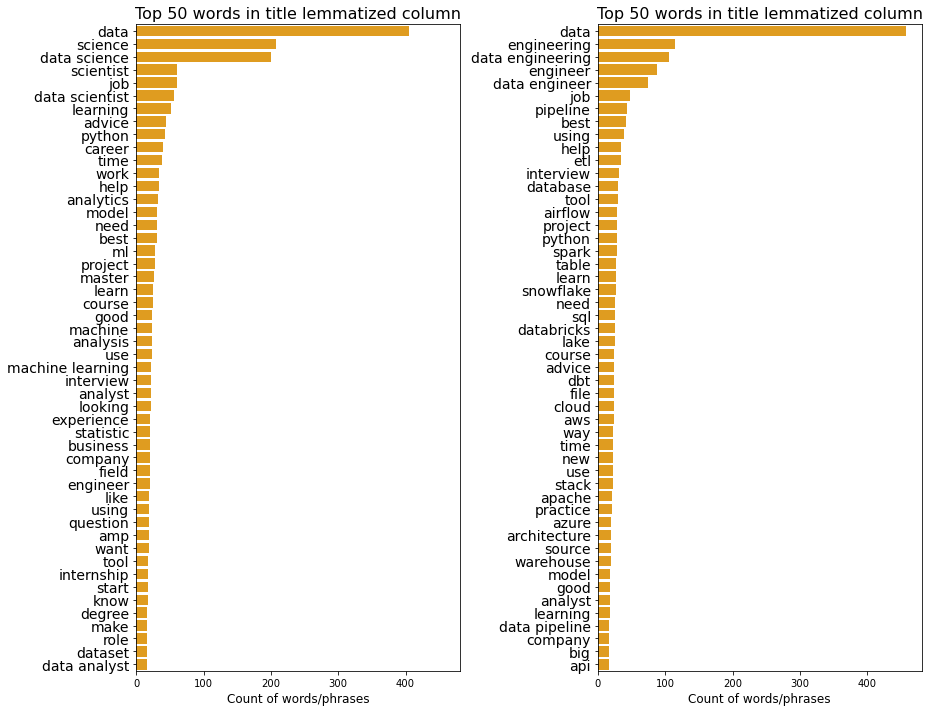

In [32]:
plot_top_count(ds, de,'title lemmatized', 50)

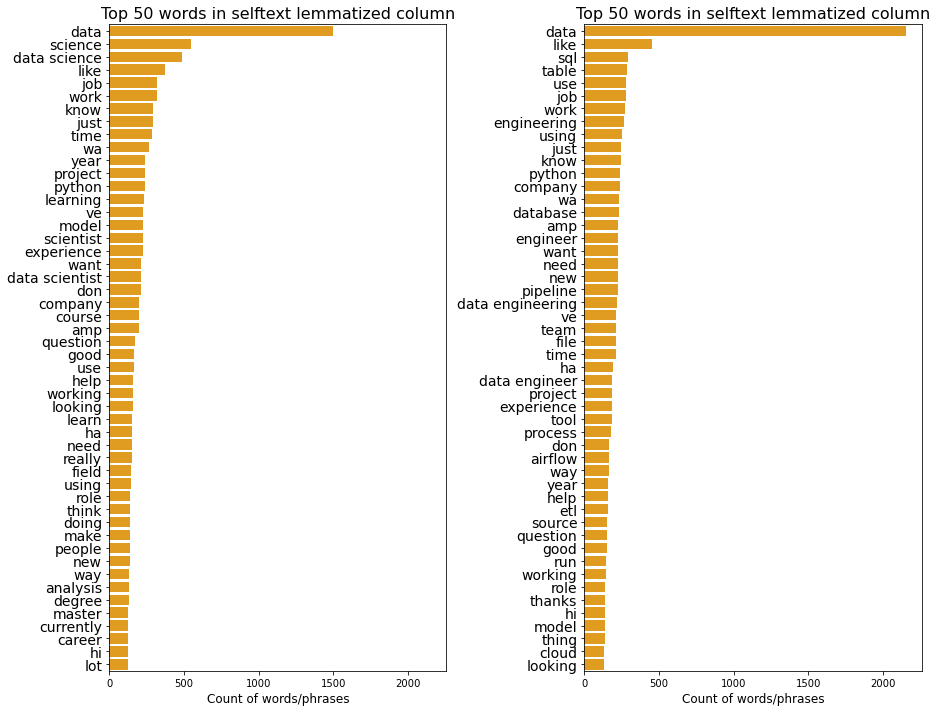

In [33]:
plot_top_count(ds, de,'selftext lemmatized', 50)

The most frequent words are still somewhat similar to the unlemmatized columns. We see a few words to remove such as 'https' and 'www'.

Next, we will be changing values of subreddits in both datasets('datascience' to 1 and 'dataengineering' to 0) before merging the datasets.

In [34]:
# Changing subreddit to 1 for 'datascience' and 0 for 'dataengineering'
ds['subreddit'] = 1
de['subreddit'] = 0

# Combining dataframes 
data_comb = pd.concat([ds, de])

# Resetting index
data_comb.reset_index(drop = True)

data_comb

title  \
0    edge regression with edge features in graph ne...   
1                          aspiring to be data analyst   
2    how to build your own chatbot in python using ...   
3    ds bi graduate certificates vs masters of ds c...   
4            target salary for fresh phd grad in stats   
..                                                 ...   
954  made pancakedb new type of columnar db that us...   
955  how to replace all values with one integer and...   
956     how to switch from etl testing role to de role   
957  has anyone done an aws live classroom training...   
958              options for client data retrieval etl   

                                              selftext  subreddit  \
0    hey guys working on gnn to do edge regression ...          1   
1    can someone suggest me how should study data s...          1   
2    how to build your own chatbot in python using ...          1   
3    as title says know most people in the ds field...          1   
4    hi all graduating from my phd in few months an...          1   
..                                                 ...        ...   
954  made pancakedb new type of columnar db that us...          0   
955               basically binning or other as thanks          0   
956  have years of work experience in etl testing a...          0   
957  specifically asking for the data warehousing o...          0   
958  we are planning to build product to provide da...          0   

                                      title lemmatized  \
0    edge regression with edge feature in graph neu...   
1                          aspiring to be data analyst   
2    how to build your own chatbot in python using ...   
3     d bi graduate certificate v master of d c degree   
4            target salary for fresh phd grad in stats   
..                                                 ...   
954  made pancakedb new type of columnar db that us...   
955  how to replace all value with one integer and ...   
956     how to switch from etl testing role to de role   
957  ha anyone done an aws live classroom training ...   
958               option for client data retrieval etl   

                                   selftext lemmatized  
0    hey guy working on gnn to do edge regression u...  
1    can someone suggest me how should study data s...  
2    how to build your own chatbot in python using ...  
3    a title say know most people in the d field lo...  
4    hi all graduating from my phd in few month and...  
..                                                 ...  
954  made pancakedb new type of columnar db that us...  
955                basically binning or other a thanks  
956  have year of work experience in etl testing an...  
957  specifically asking for the data warehousing o...  
958  we are planning to build product to provide da...  

[1901 rows x 5 columns]

## Exporting dataset

In [35]:
data_comb.to_csv('../data/data_comb.csv', index = False)